Annotaion experiment based on the npy files that created

In [1]:
# Import Libraries
import os
import pandas as pd

In [2]:
variables = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']

In [3]:
BASE_DIR = '/home/h6x/git_projects/data_processing/processed_data/adjacency_pers_images_npy_county/experimet_3'
DATA_DIR = f"{BASE_DIR}/npy_all_variables"
COMBINED_FEATURES_DIR = f"{BASE_DIR}/npy_combined"

In [4]:
ANNOTATION_PATH = '/home/h6x/git_projects/data_processing/processed_data/svi_with_hepvu/2018/annotations_2018/annotation_NOD.csv'

In [5]:
def get_npy_filenames(directory):
    """
    Get all .npy file names in the specified directory without the .npy extension.
    
    Args:
    directory (str): The path to the directory containing .npy files.
    
    Returns:
    list: A list of file names without the .npy extension.
    """
    file_names = []
    for file in os.listdir(directory):
        if file.endswith('.npy'):
            file_names.append(os.path.splitext(file)[0])
    return file_names

In [6]:
fips_codes = get_npy_filenames(COMBINED_FEATURES_DIR)

In [7]:
len(fips_codes)

2746

In [8]:
# full annotation df
annotation_df = pd.read_csv(ANNOTATION_PATH,dtype={'STCNTY':str})

In [9]:
# Filter the annotation dataframe to only include the FIPS codes that have been processed
annotation_df_filtered = annotation_df[annotation_df['STCNTY'].isin(fips_codes)]

In [10]:
annotation_df_filtered.shape

(2745, 5)

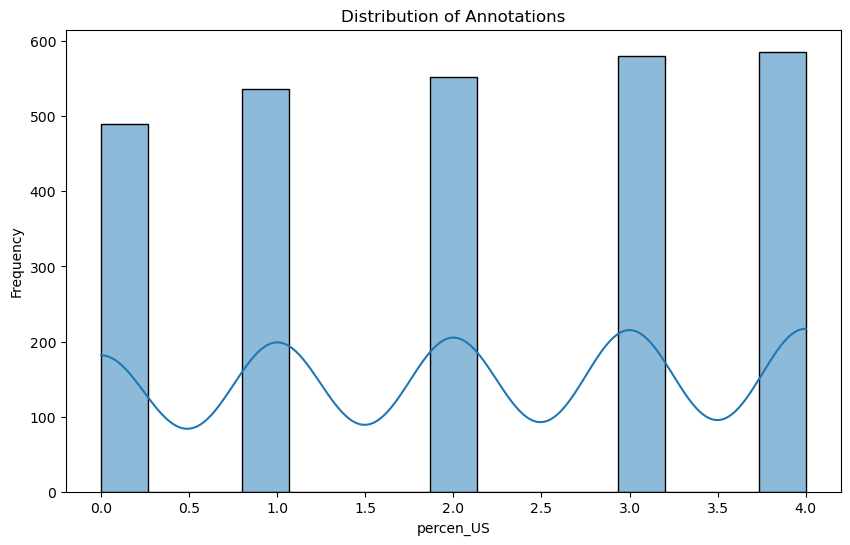

In [11]:
# plot the distribution of the annotations "pecen_US" column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(annotation_df_filtered['percen_US'], kde=True)
plt.title('Distribution of Annotations')
plt.xlabel('percen_US')
plt.ylabel('Frequency')
plt.show()

In [12]:
# in annotation_df_filtered, the column "percen_US" change the values 0,1,2, values to 0 and  then turn the values 3,4,5 to 1
annotation_df_filtered['percen_US'] = annotation_df_filtered['percen_US'].replace({0: 0, 1: 0, 2: 0,3: 0})
annotation_df_filtered['percen_US'] = annotation_df_filtered['percen_US'].replace({4: 1})

/tmp/ipykernel_1870951/3167186645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotation_df_filtered['percen_US'] = annotation_df_filtered['percen_US'].replace({0: 0, 1: 0, 2: 0,3: 0})
/tmp/ipykernel_1870951/3167186645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotation_df_filtered['percen_US'] = annotation_df_filtered['percen_US'].replace({4: 1})


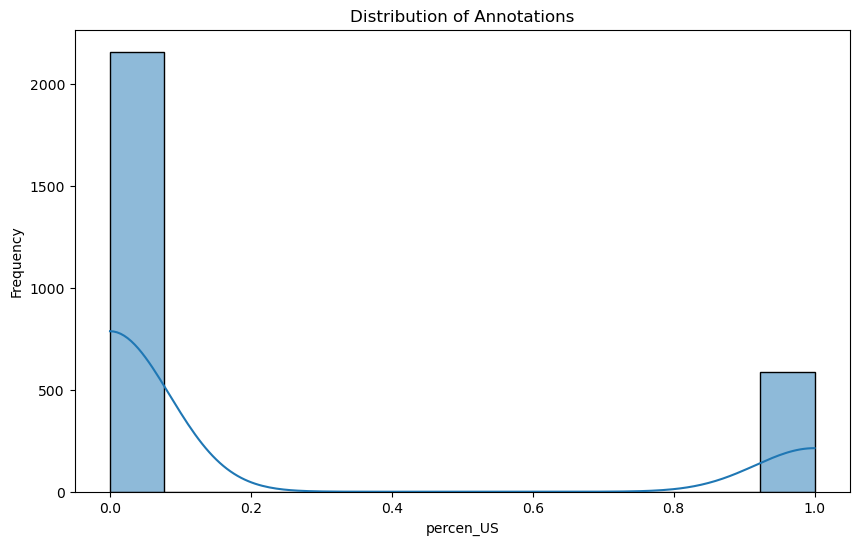

In [13]:
# plot the distribution of the annotations "pecen_US" column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(annotation_df_filtered['percen_US'], kde=True)
plt.title('Distribution of Annotations')
plt.xlabel('percen_US')
plt.ylabel('Frequency')
plt.show()

In [15]:
# output annotation path
OUTPUT_ANNOTATION_PATH = f'{BASE_DIR}/annotations_npy_2_classes_only_h0h1_class_inbalanced_exp_3.csv'

# Save the filtered annotation dataframe
annotation_df_filtered.to_csv(OUTPUT_ANNOTATION_PATH, index=False)

In [14]:
# get random 2000 samples from the annotation_df_filtered class 0 and all the samples from class 1

class_0 = annotation_df_filtered[annotation_df_filtered['percen_US'] == 0].sample(n=625, random_state=42)
class_1 = annotation_df_filtered[annotation_df_filtered['percen_US'] == 1]

# Combine the two classes
combined_df = pd.concat([class_0, class_1])

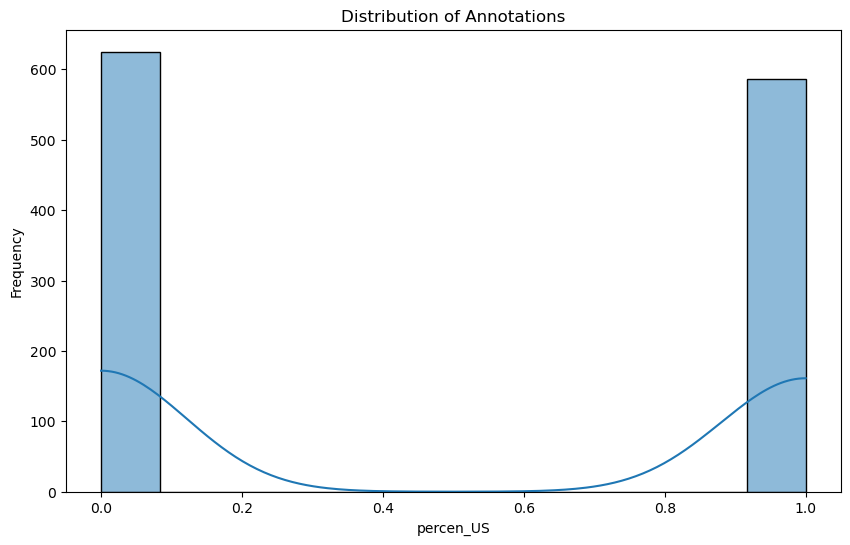

In [15]:
# plot the distribution of the annotations "pecen_US" column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(combined_df['percen_US'], kde=True)
plt.title('Distribution of Annotations')
plt.xlabel('percen_US')
plt.ylabel('Frequency')
plt.show()

In [16]:
# output annotation path
OUTPUT_ANNOTATION_PATH = f'{BASE_DIR}/annotations_npy_2_classes_only_h0h1_01.csv'

In [17]:
# Save the filtered annotation dataframe
combined_df.to_csv(OUTPUT_ANNOTATION_PATH, index=False)